# The DFT shifting theorem

In [1]:
%run ../setup.ipynb

We've seen that for signals $x$ which are pure sinusoids at an analysis frequency of index $m$, the corresponding DFT component $X[m]$ encodes the signal's amplitude and phase as a single complex number.

But what can we say about phase for more general signals?  In particular, if we have an arbitrary signal $x$ (not necessarily a sinusoid), what happens if we delay it?

Before we continue down this line of thought, we must first establish what it means to delay a signal under our periodicity assumption.
This leads us to the notion of a **circular shift**.

````{admonition} Definition: Circular shifting
Let $x[n]$ be a signal of $N$ samples with DFT series $X[m]$, and define 

```{math}
y[n] = x[n-d \mod N]
```
to be the **circular shift** of $x$ by $d$ samples.
````

When it is clear from context that shifting is circular, we my drop the "$\mod N$" notation and simply write $y[n] = x[n-d]$.

Circular shifting can seem like a strange thing to do: taking samples from the end of the signal and putting them at the beginning? *Surely you jest!*

However, it is a natural consequence of combining our {ref}`periodicity assumption <dft-periodicity>` with the definition of delay.

Indeed, it can lead to some strange behaviors if $x[n]$ is discontinuous at the repetition boundaries.

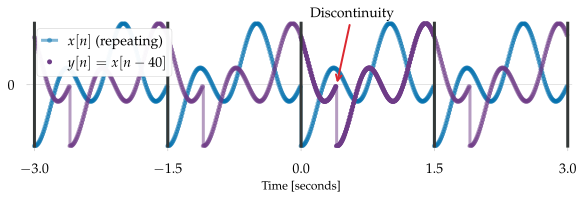

In [3]:
# Plot a repeating signal
fig, ax = plt.subplots(figsize=figaspect(1./3))

fs = 100

t = np.arange(-3 * fs, 3. * fs) / fs

f0 = 1.5
f1 = 1/2

x_part = np.cos(2 * np.pi * f0 * t[:int(f0 * fs)]) + np.cos(2 * np.pi * f1 * t[:int(f0 * fs)])
y_part = np.roll(x_part, 40)
x_full = np.tile(x_part, 4)
y_full = np.tile(y_part, 4)

ax.step(t, x_full, alpha=0.5, marker='.', where='post', label=r'$x[n]$ (repeating)')
ax.step(t, y_full, alpha=0.5, marker='.', color=colors[4], where='post')
ax.plot(t[3*fs:int(4.5*fs)], y_part, label=r'$y[n] = x[n-40]$', color=colors[4], marker='.', linestyle='')
ax.vlines([-3, -1.5, 0, 1.5, 3], -3, 3, colors=colors[3], zorder=3)
ax.legend(loc='upper left')
ax.set_ylim([-2.05, 2.05])
ax.set_xlim([-3.05, 3.05])
ax.set_yticks([0])
ax.set_xticks([-3, -1.5, 0, 1.5, 3])

ax.annotate('Discontinuity', (40/fs, 0), (10/fs, 2.2),
              arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=2, color=colors[1]))
ax.set_xlabel('Time [seconds]');
glue("circ_shift", fig, display=False);

```{glue:figure} circ_shift
---
name: circ_shift
---

A repeating signal $x[n]$ with repetition boundaries (vertical lines) is shifted by 40 samples to produce $y[n]$.
Because $x[n]$ is discontinuous at the repetition boundary, this discontinuity is shifted to the middle of $y[n]$, appearing as a large vertical gap in the signal.
```

Given this definition of shifting (delay), we can say the following about its effect on the DFT spectrum of a signal.

(shifting-theorem)=
````{admonition} Theorem: DFT shifting
:class: information

Let $x[n]$ be a signal with DFT spectrum $X[m]$, and let $y[n] = x[n-d]$ be the circular shift of $x$ by $d$ samples.

The DFT spectrum of $y[n]$ is given by:

```{math}
Y[m] = X[m] \cdot \exp\left(-\mathrm{j} \cdot 2\pi \cdot \frac{m}{N} \cdot d\right).
```
````

This says that no matter what delay we use, it's always possible to exactly predict the spectrum of the delayed signal from the spectrum of the input signal.  *That's kind of awesome!*

## Proof

The proof of the shifting theorem is purely algebraic, and relies on the periodicity assumption of $x$ to allow a change of variables in the similarity calculation.
Specifically, if we have an index $n$, we will introduce a new variable $k=n-d$, and equivalently, $n=k+d$.
In this case, $n=0$ corresponds to $k=-d$, and $n=N-1$ corresponds to $k=N-1-d$.
Then we can calculate the DFT spectrum as follows

$$
\begin{align*}
Y[m] &= \sum_{n=0}^{N-1} y[n] \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right) & \text{By definition of DFT}\\
&= \sum_{n=0}^{N-1} x[n-d] \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot n \right) &y[n] = x[n-d]\\
&= \sum_{k=-d}^{N-1-d} x[k] \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot (k+d) \right) & k=n-d\\
&= \sum_{k=-d}^{N-1-d} x[k] \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot k \right) \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot d \right) & e^{a+b}=e^a\cdot e^b\\
&= \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot d \right) \cdot\left( \sum_{k=-d}^{N-1-d} x[k] \cdot \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot k \right)\right) & \text{Delay factor is constant over sum}\\
&= \exp\left(-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot d \right) \cdot X[m] & \text{by definition of DFT}.
\end{align*}
$$

The last step follows because even though the summation ranges from $k=-d$ to $k=N-1-d$, it still computes the full DFT of $x$, just in a different order.

## What does this do?

It's worth taking some time to understand the shifting theorem.
Not only does it say exactly how the spectrum changes, as a signal shifts in time, but the change itself is also interesting.

Note that the argument of the exponential is a purely imaginary number:

```{math}
-\mathrm{j}\cdot 2\pi \cdot \frac{m}{N} \cdot d.
```

This means that multiplication implements a **rotation** of $X[m]$ in the complex plane.
Its phase can change, but the magnitude must be the same.

Of course, this is exactly what we would hope should happen: delay only changes the horizontal (time) position of a signal, not its amplitude.

A slightly more subtle point is that each DFT component $X[m]$ changes **by a different amount**: the rotation depends on both $m$ and $d$.

## What does this not do?

The shifting theorem implies that if a signal is circularly shifted, its magnitude spectrum is unchanged:

```{math}
y[n] = x[n-d] \quad\quad\Rightarrow\quad\quad |Y[m]| = |X[m]|.
```

However, the converse is **not true**: two signals with the same magnitude spectrum may not be related by a circular shift of one another!

### Example

Let $x[n] = 1, 0, 0, 0, 0, \dots$ denote an impulse with $N$ samples, and let $y = -x$ denote its negation.
As shown in the {ref}`previous chapter <dft-impulse>`, an impulse signal has spectrum $X[m] = 1$.
By {ref}`DFT linearity <dft-linearity>`, we also know that $y= -x$ implies $Y[m] = -X[m]$.
As a result, we have that
```{math}
|Y[m]| = |-X[m]| = |X[m]| = 1 \quad \text{for } m = 0, 1, \dots, N-1
```
so the two signals have the same magnitude spectrum.
However, there is no shift $d$ that turns $x$ into $y$!

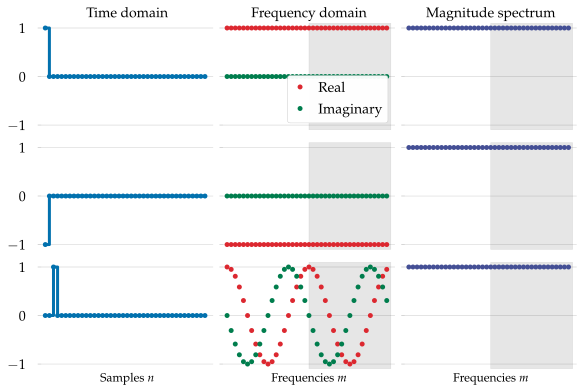

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=figaspect(2./3))

N = 40

n = np.arange(N)
x1 = np.zeros(N)
x1[0] = 1

x2 = -x1

x3 = np.roll(x1, 2)

X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
X3 = np.fft.fft(x3)

ax[0, 0].step(n, x1, marker='.', color=colors[0], where='post')
ax[1, 0].step(n, x2, marker='.', color=colors[0], where='post')
ax[2, 0].step(n, x3, marker='.', color=colors[0], where='post')

ax[0,0].label_outer()
ax[1,0].label_outer()
ax[2,0].label_outer()

ax[0, 1].plot(X1.real, marker='.', color=colors[1], linestyle='', label='Real')
ax[1, 1].plot(X2.real, marker='.', color=colors[1], linestyle='')
ax[2, 1].plot(X3.real, marker='.', color=colors[1], linestyle='')

ax[0, 1].plot(X1.imag, marker='.', color=colors[5], linestyle='', label='Imaginary')
ax[1, 1].plot(X2.imag, marker='.', color=colors[5], linestyle='')
ax[2, 1].plot(X3.imag, marker='.', color=colors[5], linestyle='')

ax[0, 1].legend(loc='lower right')

ax[0, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[1, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[2, 1].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)

ax[0,1].label_outer()
ax[1,1].label_outer()
ax[2,1].label_outer()

ax[0, 2].plot(np.abs(X1), marker='.', color=colors[11], linestyle='')
ax[1, 2].plot(np.abs(X2), marker='.', color=colors[11], linestyle='')
ax[2, 2].plot(np.abs(X3), marker='.', color=colors[11], linestyle='')

ax[0, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[1, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)
ax[2, 2].axvspan(N/2, N, color='k', alpha=0.1, zorder=-1)

ax[0, 2].label_outer()
ax[1, 2].label_outer()
ax[2, 2].label_outer()

ax[2, 0].set(xlabel='Samples $n$')
ax[2, 1].set(xlabel='Frequencies $m$')
ax[2, 2].set(xlabel='Frequencies $m$')

ax[0, 0].set(title='Time domain')
ax[0, 1].set(title='Frequency domain')
ax[0, 2].set(title='Magnitude spectrum');
ax[0, 0].set_xticks([]);
ax[0, 0].set(xlim=[-1, N+1])
glue('shifting', fig, display=False)

```{glue:figure} shifting
---
name: magnitude-shifting
---

*Left*: an impulse (top), a negative impulse (middle), and a 3-step delay (bottom).
*Center*: the DFT spectrum (real and imaginary) components of each signal are distinct.
*Right*: all three signals have identical magnitude spectra $|X[m]| = 1$ .
```

```{tip}
Phase is important.  Having the same magnitude spectrum is not enough to ensure that two signals are the same except for a phase shift!
```